In [1]:
from fastapi.testclient import TestClient
import sys


# sys.path에 현재 디렉토리 추가
sys.path.append("..")

from app.main import app

# 테스트 클라이언트 생성
client = TestClient(app)


In [ ]:
with open("image.png", "rb") as image_file:
    
    response = client.post("/assets/create", files={"file": ("image.png", image_file, "image/jpeg")})

print(response.status_code)
print(response.json())


DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'zTXt' 41 137
DEBUG:PIL.PngImagePlugin:STREAM b'iTXt' 190 647
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 849 8192


created assets:


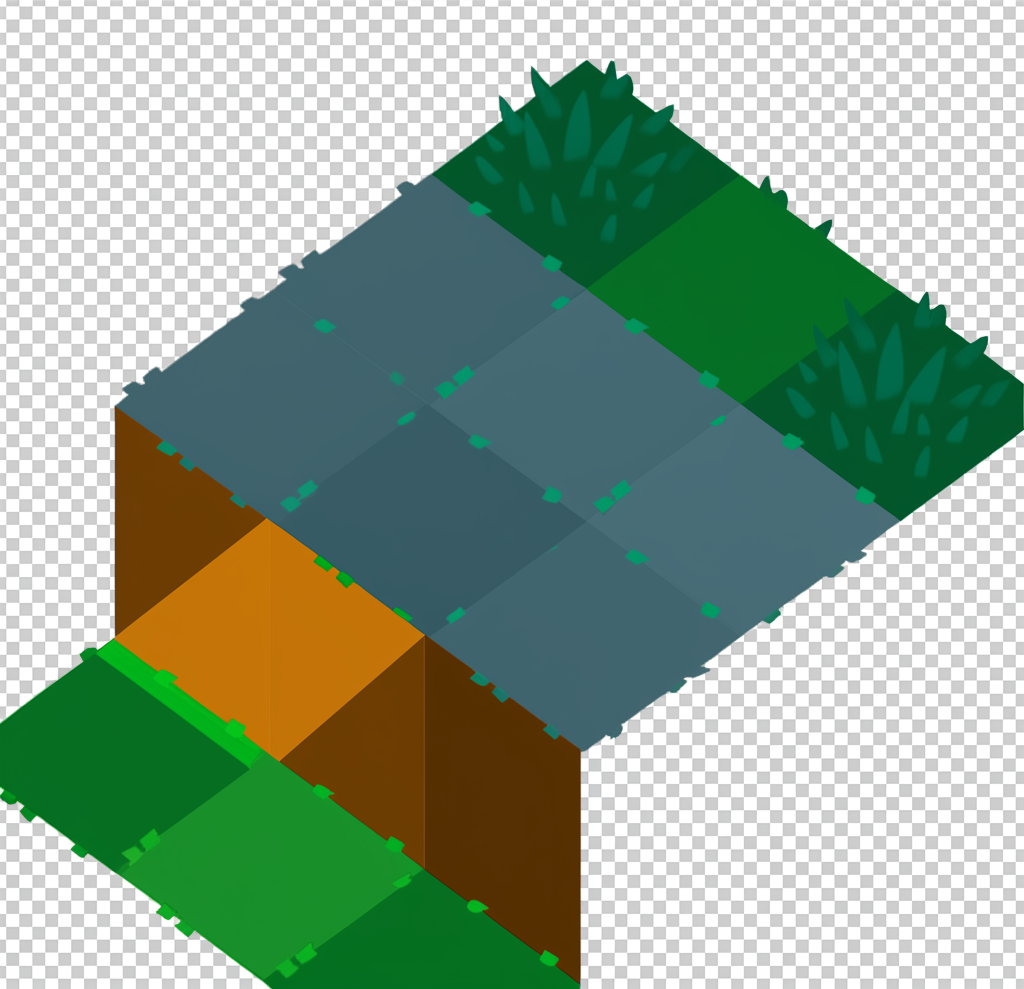

In [20]:
import base64
from io import BytesIO

from PIL import Image

assets_data = response.json().get("files", [])


assets = []
if len(assets_data) > 0:
    print("created assets:")
    for asset in assets_data:
        im_bytes = base64.b64decode(asset["content_base64"])
        image = Image.open(BytesIO(im_bytes))
        assets.append(image)
        display(image)

    